Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

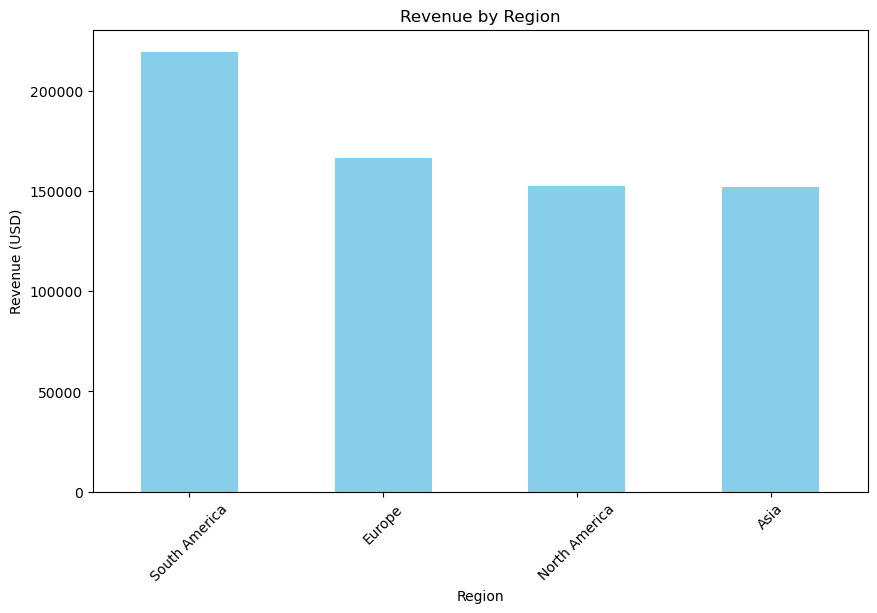

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Basic information and null value check
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Converting dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# EDA: Basic statistics
print("\nCustomer Region Distribution:")
print(customers['Region'].value_counts())

print("\nProduct Category Distribution:")
print(products['Category'].value_counts())

print("\nTransaction Summary:")
print(transactions.describe())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Top regions by revenue
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)

# Visualization
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.ylabel("Revenue (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()
